# 作業目標:

1. 藉由固定的 dataset, 來驗證不同loss function
2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響


作業重點:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate

導入必要的函數

In [117]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

資料準備

In [118]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [119]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [120]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [121]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

建立模型

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [123]:
model = Sequential()

In [124]:
#卷積層1

In [125]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [126]:
model.add(Dropout(rate=0.25))

In [127]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [128]:
#卷積層2與池化層2

In [129]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [130]:
model.add(Dropout(0.25))

In [131]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [132]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [133]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

載入之前訓練的模型

In [134]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


訓練模型

In [135]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary_crossentropy"\n查看Train/test accurancy and loss rate\n'

In [136]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])


In [137]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 71s 2ms/step - loss: 0.0903 - accuracy: 0.1015 - val_loss: 0.0899 - val_accuracy: 0.1333
Epoch 2/12
37500/37500 [==============================] - 62s 2ms/step - loss: 0.0900 - accuracy: 0.1094 - val_loss: 0.0898 - val_accuracy: 0.1320
Epoch 3/12
37500/37500 [==============================] - 64s 2ms/step - loss: 0.0899 - accuracy: 0.1160 - val_loss: 0.0897 - val_accuracy: 0.1327
Epoch 4/12
37500/37500 [==============================] - 72s 2ms/step - loss: 0.0898 - accuracy: 0.1189 - val_loss: 0.0897 - val_accuracy: 0.1369
Epoch 5/12
37500/37500 [==============================] - 56s 1ms/step - loss: 0.0897 - accuracy: 0.1210 - val_loss: 0.0896 - val_accuracy: 0.1442
Epoch 6/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0896 - accuracy: 0.1258 - val_loss: 0.0896 - val_accuracy: 0.1509
Epoch 7/12
37500/37500 [==============================] - 57s 2ms/st

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accracy', 'val_accuracy'], loc='upper left')
    plt.show()

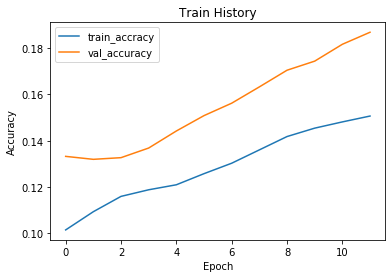

In [139]:
show_train_history('accuracy','val_accuracy')

In [140]:
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])


In [141]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 60s 2ms/step - loss: 0.3182 - accuracy: 0.9000 - val_loss: 0.3184 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 59s 2ms/step - loss: 0.3145 - accuracy: 0.9000 - val_loss: 0.3151 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.3097 - accuracy: 0.9000 - val_loss: 0.3108 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 74s 2ms/step - loss: 0.3045 - accuracy: 0.9000 - val_loss: 0.3066 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.2993 - accuracy: 0.9001 - val_loss: 0.3019 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 75s 2ms/step - loss: 0.2957 - accuracy: 0.9003 - val_loss: 0.2989 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] - 81s 2ms/st

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_accracy', 'val_accuracy'], loc='upper left')
    plt.show()

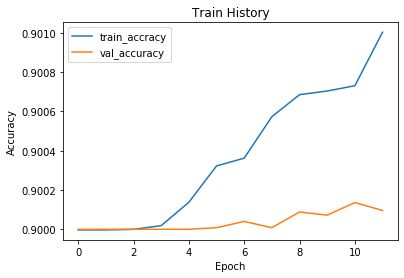

In [143]:
show_train_history('accuracy','val_accuracy')

比較"MSE", "binary _crossentropy" 查看Train/test accurancy and loss rate

發現使用 ＭＳＥ的loss函數模型,其精確度相當差,binary _crossentropy的精確率大概有約0.9.
